In [79]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import requests
import json
from api_keys import geoapify_key
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [80]:
# Import CSVs 
visa_data_path = Path("Data/ABS_NOM_VISA.csv")
gender_data_path = Path("Data/ABS_NOM_AGE-GENDER.csv")

visa_data_df = pd.read_csv(visa_data_path, encoding="utf-8")
gender_data_df = pd.read_csv(gender_data_path, encoding="utf-8")

In [81]:
# Check gender dataframe
gender_data_df.head()

,DATAFLOW,MEASURE: Measure,AGE: Age,SEX: Sex,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2005,1570,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
1,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2006,2080,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
2,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2007,2760,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
3,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2008,2890,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
4,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2009,3230,NUM: Number,NaN,NaN,30-6: Year Ending 30 June


In [82]:
# Filter and delete columns 
gender_data_df = gender_data_df.loc[(gender_data_df["MEASURE: Measure"]) == "1: NOM arrivals"]
gender_data_df = gender_data_df.loc[(gender_data_df["AGE: Age"]) != "TOT: All ages"]
gender_data_df = gender_data_df.loc[(gender_data_df["REGION: Region"]) != "AUS: Australia"]
gender_data_df = gender_data_df[["AGE: Age", "SEX: Sex", "REGION: Region", "TIME_PERIOD: Time Period", "OBS_VALUE"]]
gender_data_df = gender_data_df.rename(columns={"AGE: Age":"Age", "SEX: Sex":"Sex", "REGION: Region": "Region", "TIME_PERIOD: Time Period":"Year", "OBS_VALUE": "Value"})
gender_data_df.head()

,Age,Sex,Region,Year,Value
72,A10: 10-14,2: Females,7: Northern Territory,2005,60
73,A10: 10-14,2: Females,7: Northern Territory,2006,60
74,A10: 10-14,2: Females,7: Northern Territory,2007,80
75,A10: 10-14,2: Females,7: Northern Territory,2008,100
76,A10: 10-14,2: Females,7: Northern Territory,2009,100


In [83]:
# Check totals
total_arrivals = gender_data_df.groupby(["Year"])["Value"].sum()
total_arrivals_df = total_arrivals.reset_index()
total_arrivals_df

# Total arrivals agree to the ABS website 

,Year,Value
0,2005,341460
1,2006,376670
2,2007,437520
3,2008,501400
4,2009,519950
5,2010,438010
6,2011,431910
7,2012,467490
8,2013,482230
9,2014,464840


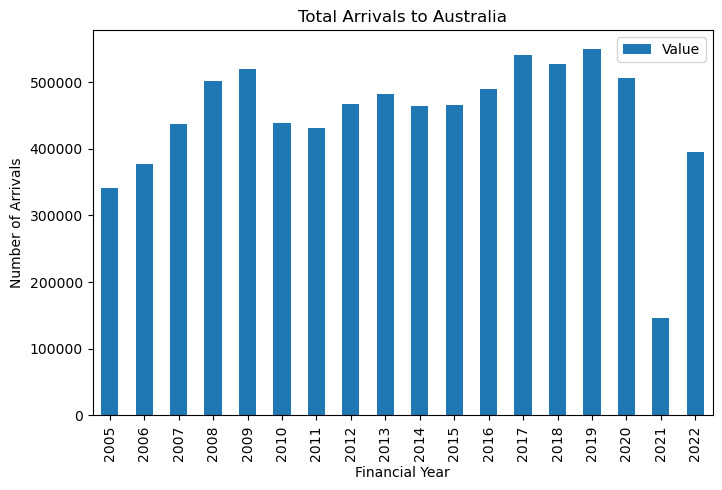

In [84]:
# Create a graph showing the total number of migrations 
total_arrivals_df.plot(kind="bar", x="Year", y="Value", figsize=(8,5), title="Total Arrivals to Australia")
plt.xlabel("Financial Year")
plt.ylabel("Number of Arrivals")
plt.legend(loc="best")
plt.show()

In [85]:
# Create a graph showing the total number of migrations 
region_data = gender_data_df.groupby(["Year", "Region"])["Value"].sum()
region_data_df = region_data.reset_index() 
region_data_df = region_data_df.pivot(index="Year", columns="Region", values="Value")
region_data_df = region_data_df.rename(columns={"1: New South Wales":"NSW", "2: Victoria":"VIC", 
                                                "3: Queensland": "QLD", "4: South Australia":"SA",
                                                "5: Western Australia": "WA", "6: Tasmania": "TAS",
                                                "7: Northern Territory":"NT", "8: Australian Capital Territory":"ACT"})
region_data_df

Region,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
Year,,,,,,,,
2005,125190,81270,65400,16620,40000,3160,4430,5390
2006,132750,89890,73090,20570,47190,3390,3950,5840
2007,150600,108600,86520,23520,53850,3430,4580,6420
2008,170960,123460,99680,25180,66140,3910,4720,7350
2009,169040,132690,103140,27260,69730,4310,5550,8230
2010,144220,109140,84920,24820,57940,4020,4680,8270
2011,141980,104940,84280,20160,64950,3480,4850,7270
2012,140880,112290,93210,23000,78010,3800,6770,9530
2013,152640,119270,92850,22630,74400,3930,7820,8690


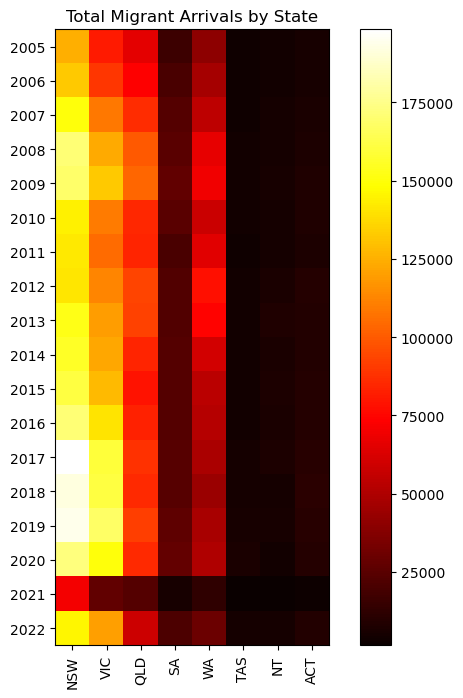

In [86]:
# Heat map of arrivals by region
plt.figure(figsize=(8, 8))
plt.title("Total Migrant Arrivals by State")
plt.imshow(region_data_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(region_data_df.columns)), region_data_df.columns, rotation = 90)
plt.yticks(range(len(region_data_df.index)), region_data_df.index)
plt.show()

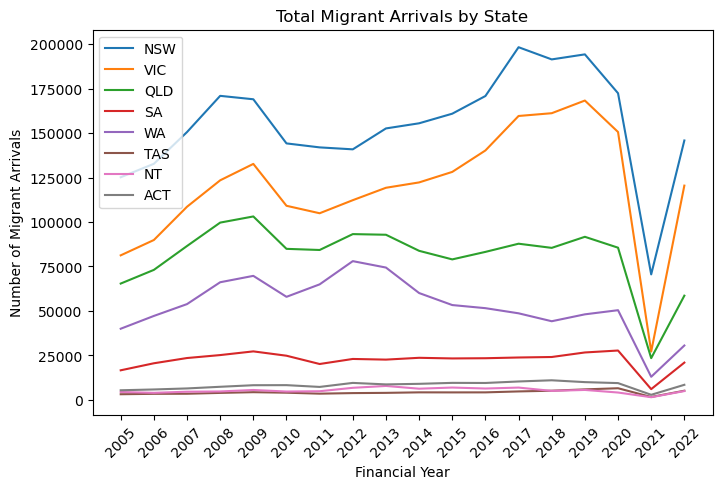

In [87]:
# Get the state with the most arrivals in all years
region_data_df.plot(kind="line", figsize=(8, 5), rot=45)
plt.legend(loc="best")
plt.title("Total Migrant Arrivals by State")
plt.xlabel("Financial Year")
plt.ylabel("Number of Migrant Arrivals")
plt.xticks(region_data_df.index)
plt.show()

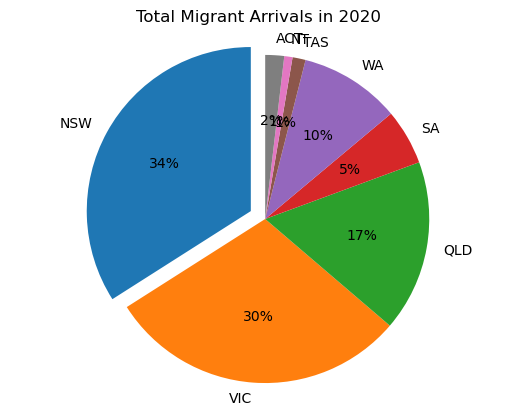

In [88]:
# What percentage of migrants arrivals are going to each region in 2020 (before COVID)
labels = region_data_df.columns
sizes = region_data_df.loc[2020] / region_data_df.loc[2020].sum() * 100
explode = (0.1, 0, 0, 0, 0, 0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.0f%%", startangle=90)
plt.title("Total Migrant Arrivals in 2020")
plt.axis("equal")
plt.show()

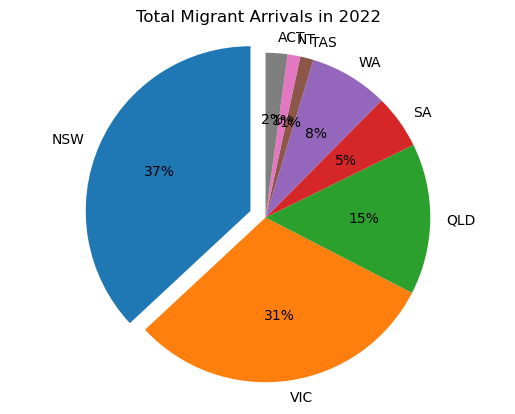

In [89]:
# What percentage of migrants arrivals are going to each region in 2022 (post COVID)
sizes2 = region_data_df.loc[2022] / region_data_df.loc[2022].sum() * 100
plt.pie(sizes2, explode=explode, labels=labels, autopct="%1.0f%%", startangle=90)
plt.title("Total Migrant Arrivals in 2022")
plt.axis("equal")
plt.show()

In [90]:
# Visualise map for migrant arrivals in 2022 
# Create dataframe to hold latitude and longitude
cities = ["Sydney", "Melbourne", "Brisbane", "Adelaide", 
          "Perth", "Hobart", "Darwin", "Canberra"]

city_data = {"City": cities,
           "Lat": "",
           "Lon": "",
           "Arrivals": ""}
region_map_2022 = pd.DataFrame(city_data)
region_map_2022

,City,Lat,Lon,Arrivals
0,Sydney,,,
1,Melbourne,,,
2,Brisbane,,,
3,Adelaide,,,
4,Perth,,,
5,Hobart,,,
6,Darwin,,,
7,Canberra,,,


In [91]:
# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

base_url = "https://api.geoapify.com/v1/geocode/search"

# Loop through the cities_pd DataFrame and return coordinates for each city
for index, row in region_map_2022.iterrows():
    city = row["City"] + ", Australia"
    params["text"] = f"{city}"

    response = requests.get(base_url, params=params).json()
    region_map_2022.loc[index, "Lat"] = response["results"][0]["lat"]
    region_map_2022.loc[index, "Lon"] = response["results"][0]["lon"]

region_map_2022

,City,Lat,Lon,Arrivals
0,Sydney,-33.869844,151.208285,
1,Melbourne,-37.814218,144.963161,
2,Brisbane,-27.468968,153.023499,
3,Adelaide,-34.928181,138.599931,
4,Perth,-31.955896,115.86058,
5,Hobart,-42.882509,147.328123,
6,Darwin,-12.46044,130.841047,
7,Canberra,-35.297591,149.101268,


In [92]:
# Update DF to the relevant states and remap
region_map_2022 = region_map_2022.rename(columns={"City": "Region"})

cities_mapping = {
	"Sydney": "NSW", 
    "Melbourne": "VIC", 
    "Brisbane":"QLD", 
    "Adelaide":"SA",
    "Perth":"WA", 
    "Hobart":"TAS",
    "Darwin":"NT", 
    "Canberra":"ACT"
}

region_map_2022["Region"] = region_map_2022["Region"].map(cities_mapping)
region_map_2022

,Region,Lat,Lon,Arrivals
0,NSW,-33.869844,151.208285,
1,VIC,-37.814218,144.963161,
2,QLD,-27.468968,153.023499,
3,SA,-34.928181,138.599931,
4,WA,-31.955896,115.86058,
5,TAS,-42.882509,147.328123,
6,NT,-12.46044,130.841047,
7,ACT,-35.297591,149.101268,


In [93]:
# Create series for the 2022 arrivals data per region 
arrivals_2022 = region_data_df.loc[2022]
arrivals_2022

Region
NSW    145860
VIC    120480
QLD     58590
SA      20940
WA      30560
TAS      5140
NT       4940
ACT      8460
Name: 2022, dtype: int64

In [94]:
# Add arrivals 2022 series to the dataframe 
region_map_2022 = region_map_2022.set_index("Region")
region_map_2022["Arrivals"] = arrivals_2022
region_map_2022["Arrivals"] = region_map_2022["Arrivals"].astype(float)
region_map_2022

,Lat,Lon,Arrivals
Region,,,
NSW,-33.869844,151.208285,145860.0
VIC,-37.814218,144.963161,120480.0
QLD,-27.468968,153.023499,58590.0
SA,-34.928181,138.599931,20940.0
WA,-31.955896,115.86058,30560.0
TAS,-42.882509,147.328123,5140.0
NT,-12.46044,130.841047,4940.0
ACT,-35.297591,149.101268,8460.0


In [100]:
# Reset index
region_map_2022.reset_index(inplace=True)
region_map_2022

,Region,Lat,Lon,Arrivals
0,NSW,-33.869844,151.208285,145860.0
1,VIC,-37.814218,144.963161,120480.0
2,QLD,-27.468968,153.023499,58590.0
3,SA,-34.928181,138.599931,20940.0
4,WA,-31.955896,115.86058,30560.0
5,TAS,-42.882509,147.328123,5140.0
6,NT,-12.46044,130.841047,4940.0
7,ACT,-35.297591,149.101268,8460.0


In [104]:
# Configure map plot
map_plot_1 = region_map_2022.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 550,
    frame_height = 400,
    size = "Arrivals",
    color = "Region",
    alpha = 0.5,
    scale = 0.12,
)
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Region,Arrivals)